In [1]:
from main import *

NOTEBOOK_ID = '12'
RUN_CALCULATIONS = False

Global seed set to 0


# calculate AD activity

In [3]:
if RUN_CALCULATIONS:
    import sys
    sys.path.insert(1, '../01-SCRIPTS/03-labtools')
    from sort import *

    library_df = pd.read_csv(f'{LIBRARY_DIR}/library.csv')
    library_df.rename(columns={'na_seq':'ArrayDNA'}).to_csv(f'{METADATA_DIR}/eLW028_design.csv')
    sort_df = pd.read_excel(f'{METADATA_DIR}/eLW028-sort_metrics.xlsx')
    sort_dict = {'sort_1':('1','sort_1*'),
                'sort_2':('2','sort_2*'),
                'sort_2_noPCR1':('2','sort_2*no_PCR*'),
                'sort_2_merged':('2','sort_2*merged*')}

    for name,vals in sort_dict.items():
        sort, query = vals
        bin_vals = list(sort_df.query(f'sort == {sort}')['median'])
        seq_files = sorted(list(glob(f'{HARMONIZE_DIR}/03-assemble/{query}.fastq')))
        if name == 'sort_2':
            seq_files = [seq_file for seq_file in seq_files if 'PCR' not in seq_file and 'merged' not in seq_file]
        assert len(seq_files) == 8
        
        out_name = f'eLW028_{name}'
        if not os.path.isfile(f'{HARMONIZE_DIR}/04-results/{out_name}_data.csv'):
            my_sort = Sort(seq_files, bin_counts = [1_000_000]*8, bin_values = bin_vals, design_file = f'{METADATA_DIR}/eLW028_design.csv')
            sort_data = my_sort.process(thresh=50,
                                        ad_preceder="GCTAGC",
                                        ad_length = 53*3,
                                        barcoded = True)
            parse_sort_results(sort_data,
                            out_name=out_name,
                            results_out_dir=f'{HARMONIZE_DIR}/04-results',
                            fig_out_dir=f'{FIGURE_DIR}/{NOTEBOOK_ID}')

# analyze results

In [2]:
out_file = f'{HARMONIZE_DIR}/04-results/active_learning_activity.csv'
if not os.path.isfile(out_file):
    dataset_dict = {}
    dataset_dict['sort_1'] = pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_1_activities.csv').drop(columns=['Unnamed: 0'])
    dataset_dict['sort_2'] = pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_2_activities.csv').drop(columns=['Unnamed: 0'])
    dataset_dict['sort_2_noPCR1'] = pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_2_noPCR1_activities.csv').drop(columns=['Unnamed: 0'])
    dataset_dict['sort_2_merged'] = pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_2_merged_activities.csv').drop(columns=['Unnamed: 0'])
    
    sort_df = None
    for key in dataset_dict.keys():
        dataset_dict[key]['dataset'] = key
        sort_df = pd.concat([sort_df, dataset_dict[key]])
    sort_df = sort_df.reset_index(drop=True)
    sort_df.to_csv(out_file,index=False)
else:
    sort_df = pd.read_csv(out_file)
sort_df

,DNAseq,BC,0,1,2,3,4,5,6,7,Activity,dataset
0,TTGGCTGATTATATGTGTGATTATTCTGGTTCTTTGATTGGTAAAC...,CCAAGACGTAC,0.127501,0.029370,0.116881,0.129944,0.253687,0.123957,0.119829,0.098831,80896.459134,sort_1
1,TGGCCCTTCGACGAGTCCATTGAGAGGAATTTTAGTACCACGGCAA...,TTATTCAAATA,0.310892,0.272770,0.145157,0.206979,0.014447,0.049755,0.000000,0.000000,28014.986578,sort_1
2,TCTACTGCTACTGAATCTGGTTTGGCTGCTAGATCTAAAGATCAAA...,CCAGCGTACAC,0.032176,0.077841,0.159834,0.000000,0.264284,0.137944,0.271606,0.056315,89470.541076,sort_1
3,GCTGCTGCTGCTGCTCCAGCTACTACTACTACTGAATCTGCTCCAG...,CGAAATGGGCA,0.731792,0.055299,0.000000,0.102022,0.047302,0.063585,0.000000,0.000000,22212.994653,sort_1
4,GAAAAAGAAGCTAGACATGCTGGTAGAGAATCTAGAAAAGCTCCAG...,CAGTCTTAGAT,0.656422,0.191118,0.073546,0.056719,0.008965,0.013231,0.000000,0.000000,17844.720903,sort_1
...,...,...,...,...,...,...,...,...,...,...,...,...
248899,TTCAACAATGACGGATGGGATACATCCCTCCCTATCGATTTTGACT...,GTAGGATCAAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,262143.000000,sort_2_merged
248900,CAATATGAAACTCCAGCTCCAAAAGATTTTTTGGATGATTTTGTTT...,ATCATAAGAGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,262143.000000,sort_2_merged
248901,CAATATGAAACTCCAGCTCCAAAAGATTTTTTGGATGATTTTGTTT...,AAAACACCTTA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,262143.000000,sort_2_merged
248902,TTCAACAATGACGGATGGGATACATCCCTCCCTATCGATTTTGACT...,GTANGAGCAAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,262143.000000,sort_2_merged


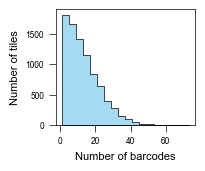

In [11]:
plt.figure(figsize=(1.8,1.5))
tmp_df = pd.concat([pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_2_totalreads.csv'),
                    pd.read_csv(f'{HARMONIZE_DIR}/04-results/eLW028_sort_2_noPCR1_totalreads.csv')])
g = sns.histplot(data=tmp_df.groupby(['DNAseq'])['BC'].count().reset_index(),x='BC',binwidth=4,element='step',edgecolor='black',color='skyblue',linewidth=0.5)
tmp_df.groupby(['DNAseq'])['BC'].count().median()
g.set(xlabel='Number of barcodes',ylabel='Number of tiles')

if SAVE_FIGURES:
     plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-barcodes_per_tile.svg',**FIGURE_PARAMS)

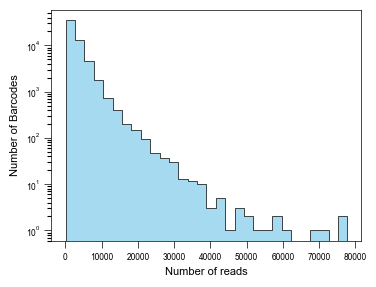

In [6]:
plt.figure(figsize=(4,3))
g = sns.histplot(data=tmp_df.groupby('BC')['num_reads_per_BC'].sum().reset_index(),x='num_reads_per_BC',bins=30,element='step',edgecolor='black',color='skyblue',linewidth=0.5)
tmp_df.groupby(['DNAseq'])['BC'].count().median()
g.set(xlabel='Number of reads',yscale='log',ylabel='Number of Barcodes')

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-reads_per_barcode.png',**FIGURE_PARAMS)

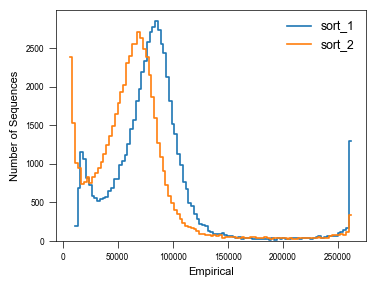

In [ ]:
plt.figure(figsize=(4,3))
for dataset in sort_df['dataset'].unique():
    if dataset == 'sort_2_merged' or dataset == 'sort_2_noPCR1':
        continue
    g = sns.histplot(data=sort_df.query(f'dataset == "{dataset}"'),x='Activity',bins=100, element='step', fill=False,label=dataset,)
g.legend(frameon=False)
g.set(xlabel='Empirical',ylabel='Number of Sequences')

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-technical_replicates_histplot.png',**FIGURE_PARAMS)

Pearson r bw activity < 250,000 and hummel 0.8966912313411667
Pearson r bw activity < 250,000 and hummel 0.8966122955875027


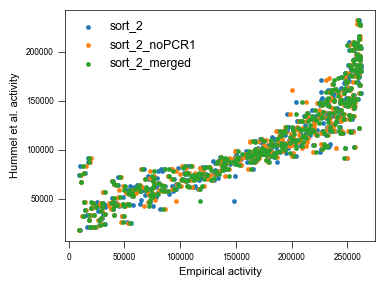

In [25]:
mean_df = sort_df.groupby(['dataset','DNAseq'])['Activity'].mean().reset_index().pivot(index='DNAseq',columns='dataset',values='Activity').dropna().reset_index()

hummel_df = pd.read_csv(f'{TARGET_DIR}/01-dataset/hummel_preprocessed_Activity_500k_Rat.csv')[['AAseq','Activity_500k_Rat']]
mean_df['AAseq'] = mean_df['DNAseq'].apply(lambda x: str(Seq(x).translate()))
merged_df = mean_df.merge(hummel_df,on='AAseq').rename(columns={'Activity_500k_Rat':'hummel_activity'})[['DNAseq','AAseq','sort_1','sort_2','sort_2_noPCR1','sort_2_merged','hummel_activity']]

print('Pearson r bw activity < 250,000 and hummel',pearsonr(merged_df['sort_2_noPCR1'],merged_df['hummel_activity'])[0])
print('Pearson r bw activity < 250,000 and hummel',pearsonr(merged_df['sort_2_merged'],merged_df['hummel_activity'])[0])

plt.figure(figsize=(4,3))
g = sns.scatterplot(data=merged_df,x='sort_2',y='hummel_activity',edgecolor=None,s=10,label='sort_2')
g = sns.scatterplot(data=merged_df,x='sort_2_noPCR1',y='hummel_activity',edgecolor=None,s=10,label='sort_2_noPCR1')
g = sns.scatterplot(data=merged_df,x='sort_2_merged',y='hummel_activity',edgecolor=None,s=10,label='sort_2_merged')
g.set(xlabel='Empirical activity',ylabel='Hummel et al. activity')
g.legend(frameon=False)

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-hummel_overlap_scatterplot.png',**FIGURE_PARAMS)

In [26]:
filtered_df = merged_df.query('sort_2_noPCR1 > 120_000 and sort_2_noPCR1 < 200_000')
print('Pearson r bw activity > 120,000 and activity < 200,000 and hummel',pearsonr(filtered_df['sort_2_noPCR1'],filtered_df['hummel_activity'])[0])
print('Pearson r bw activity > 120,000 and activity < 200,000 and hummel',pearsonr(filtered_df['sort_2_merged'],filtered_df['hummel_activity'])[0])

Pearson r bw activity > 120,000 and activity < 200,000 and hummel 0.8377288095128969
Pearson r bw activity > 120,000 and activity < 200,000 and hummel 0.8473175537514658


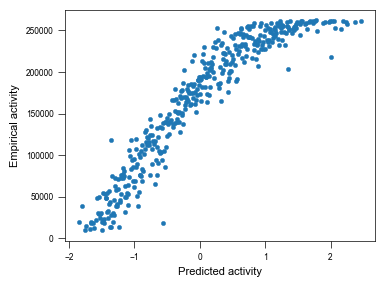

In [27]:
hummel_test_df = pd.read_csv(f'{LIBRARY_DIR}/hummel_test.csv')
hummel_test_df = mean_df.merge(hummel_test_df,left_on='AAseq',right_on='aa_seq')

plt.figure(figsize=(4,3))
g = sns.scatterplot(data=hummel_test_df,y='sort_2_merged',x='prediction',s=10,edgecolor=None)
g.set(ylabel='Empirical activity',xlabel='Predicted activity')

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-hummel_predictions_scatterplot.png',**FIGURE_PARAMS)

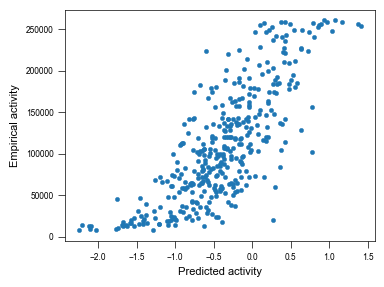

In [28]:
sanborn_test_df = pd.read_csv(f'{LIBRARY_DIR}/sanborn_test.csv')
sanborn_test_df = mean_df.merge(sanborn_test_df,left_on='AAseq',right_on='protein sequence')

plt.figure(figsize=(4,3))
g = sns.scatterplot(data=sanborn_test_df,y='sort_2_merged',x='predictions',edgecolor=None,s=10)
g.set(ylabel='Empirical activity',xlabel='Predicted activity')

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-sanborn_predictions_scatterplot.png',**FIGURE_PARAMS)

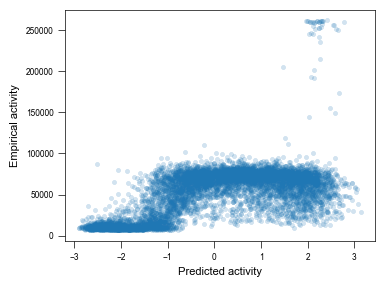

In [29]:
mycocosm_df = pd.read_csv(f'{LIBRARY_DIR}/mycocosm_test.csv').drop(columns=['Unnamed: 0']).rename(columns={'seq':'AAseq'})
mycocosm_df = mycocosm_df.merge(mean_df,on='AAseq')
plt.figure(figsize=(4,3))
g = sns.scatterplot(data=mycocosm_df,x='predictions',y='sort_2_merged',edgecolor=None,s=10,alpha=0.2)
g.set(xlabel='Predicted activity',ylabel='Empirical activity')

if SAVE_FIGURES:
    plt.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-sanborn_predictions_scatterplot.png',**FIGURE_PARAMS)